# 부동산 가격 흐름

### 데이터: 월간 KB주택가격동향
- 홈페이지: https://onland.kbstar.com
- 저장 폴더: real_estate_data
- 파일 이름: ★(월간)KB주택가격동향_시계열(2019.09).xlsx

#### 소개
- 1986년 1월부터 현재까지의 월간 부동산 가격을 정리한 엑셀 데이터
- 아파트, 연립/단독 주택 데이터, 부동산 관련 인덱스 제공
- 제공 데이터 종류(sheet로 구분)
    - 시계열, 안내
    - ★기간비교, ★지역비교
    - 매매종합, 매매APT, 매매단독, 매매연립
    - 전세종합, 전세APT, 전세단독, 전세연립
    - KB아파트 월세지수+
    - PIR(월별), J-PIR(월별), KB아파트PIR
    - NEW_HAI, KB-HOI, KB 오피스텔, 선도50
    - 전월세전환율, 매수우위, 매매거래, 전세수급, 전세거래
    - KB부동산 매매가격 전망지수, KB부동산 전세가격 전망지수
    - 종합매매전세비, 아파트매매전세비, 단독매매전세비, 연립매매전세비
    - 규모별매매+, 규모별매매종합+, 규모별APT매매+, 규모별단독매매+, 규모별연립매매+
    - 규모별전세+, 규모별전세종합+, 규모별APT전세+, 규모별단독전세+, 규모별연립전세+
    - 청약규모별매매+, 청약규모별전세+
    - 규모별APT매매평균, 규모별APT전세평균, 규모별APT매매중위, 규모별APT전세중위
    - 청약규모별APT매매평균, 청약규모별APT전세평균, 청약규모별APT매매중위, 청약규모별APT전세중위
    - 평균매매, 평균전세, 중위매매, 중위전세
    - ㎡당평균매매, ㎡당평균전세, ㎡당아파트평균매매, ㎡당아파트평균전세, ㎡당아파트 5분위 아파트 매매, ㎡당아파트 5분위 아파트전세
    - 5분위(종합매매), 5분위(아파트매매), 5분위(종합전세), 5분위(아파트전세)

In [5]:
import os
import pandas as pd
import xlwings as xw
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

### 함수
- 이름: KBpriceindex_preprocessing
- 목적: KB데이터 중 가격지수를 나타내는 데이터 전처리 수행
- input: path, data_type
    - path: KB데이터 경로
    - data_type: 다음 sheet 중 하나 - '매매종합','매매APT','매매연립','매매단독','전세종합','전세APT','전세연립','전세단독'

In [6]:
def KBpriceindex_preprocessing(path,data_type):
    wb=xw.Book(path)
    sheet=wb.sheets[data_type]
    row_num=sheet.range(1,1).end('down').end('down').end('down').row
    data_range='A2:GE'+str(row_num)
    raw_data=sheet[data_range].options(pd.DataFrame, index=False, header=True).value
    
    bignames='서울 대구 부산 대전 광주 인천 울산 세종 경기 강원 충북 충남 전북 전남 경북 경남 제주도 6개광역시 5개광역시 수도권 기타지방 구분 전국'
    bigname_list=bignames.split(' ')
    big_col=list(raw_data.columns)
    small_col=list(raw_data.iloc[0])
    
    for num,gu_data in enumerate(small_col):
        if gu_data==None:
            small_col[num]=big_col[num]
            
        check=num
        while True:
            if big_col[check] in bigname_list:
                big_col[num]=big_col[check]
                break
            else:
                check=check-1;
        
    big_col[129]='경기'
    big_col[130]='경기'
    small_col[185]='서귀포'

    raw_data.columns=[big_col,small_col]
    new_col_data=raw_data.drop([0,1])

    index_list=list(new_col_data['구분']['구분'])

    new_index=[]

    for num, raw_index in enumerate(index_list):
        temp=str(raw_index).split('.')
        if int(temp[0])>12:
            if len(temp[0])==2:
                new_index.append('19'+temp[0]+'.'+temp[1])
            else:
                new_index.append(temp[0]+'.'+temp[1])
        else:
            new_index.append(new_index[num-1].split('.')[0]+'.'+temp[0])

    new_col_data.set_index(pd.to_datetime(new_index),inplace=True)
    cleaned_data=new_col_data.drop(('구분','구분'),axis=1)
    return cleaned_data

### 데이터 시각화 준비
- plot을 해당 notebook brower 내에서 확인하도록 설정(`%matplotlib inline`)
- 한글을 사용할 수 있도록 폰트 조절

In [7]:
%matplotlib inline
font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_name)
plt.rcParams['axes.unicode_minus']=False

In [8]:
path=os.getcwd()+'\\real_estate_data\★(월간)KB주택가격동향_시계열(2019.12).xlsx'

### 국민은행 주택가격지수
- 향후 3개월 이내 집값 상승 전망 수치화
- 100 미만: 집값 하락 예상
- 100 초과: 집값 상승 예상

In [9]:
# 매매종합 데이터 불러오기
data_type='매매종합'
new_data=KBpriceindex_preprocessing(path,data_type)

### 부동산

C:\Users\vicen\Anaconda3\envs\python37withR\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


<Figure size 720x360 with 0 Axes>

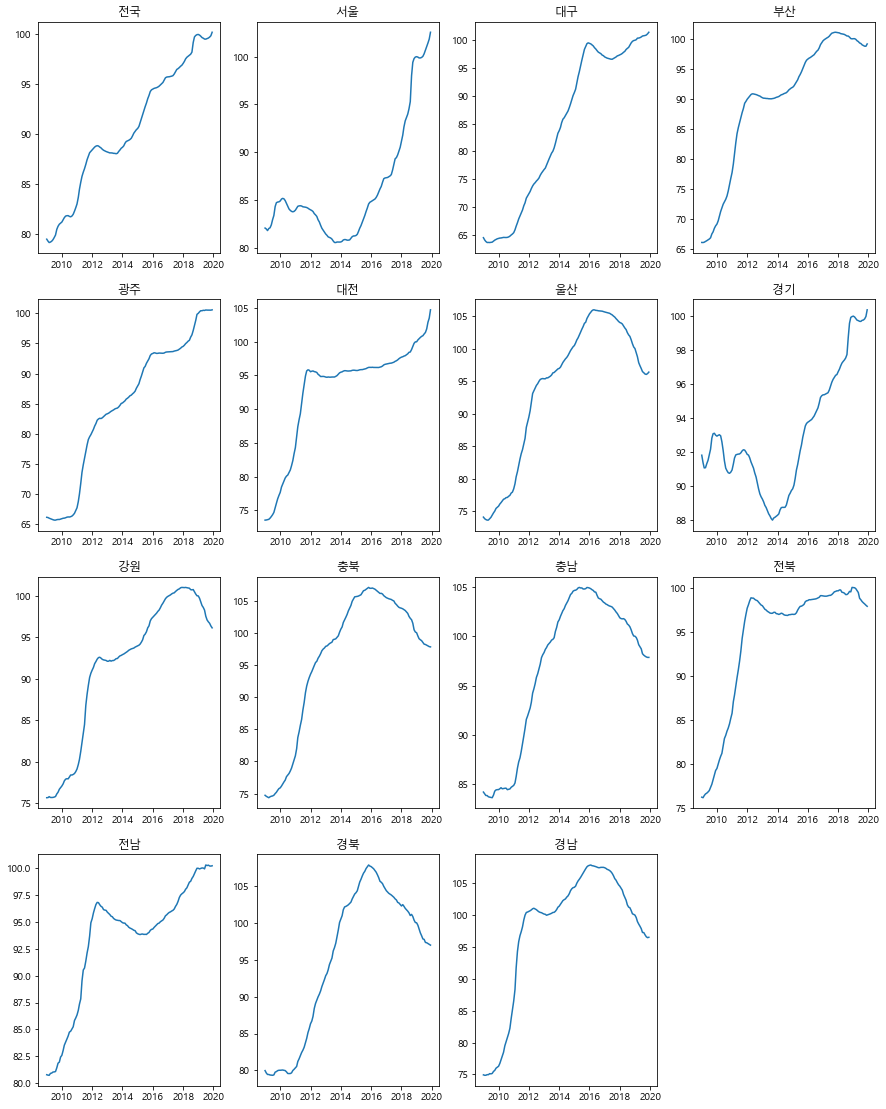

In [10]:
# 여러 지역의 최근 10년 가격지수 추이 그래프 ( 큰 범위 )
plt.figure(figsize=(10,5))

spots='전국 서울 대구 부산 광주 대전 울산 경기 강원 충북 충남 전북 전남 경북 경남'.split(' ')
start_date='2009-1'
num_row=int((len(spots)-1)/2)+1

plt.figure(figsize=(15,num_row*5))
for i,spot in enumerate(spots):
    plt.subplot(num_row,4,i+1)
    plt.title(spot)
    plt.plot(new_data[spot][spot][start_date:])

<Figure size 720x360 with 0 Axes>

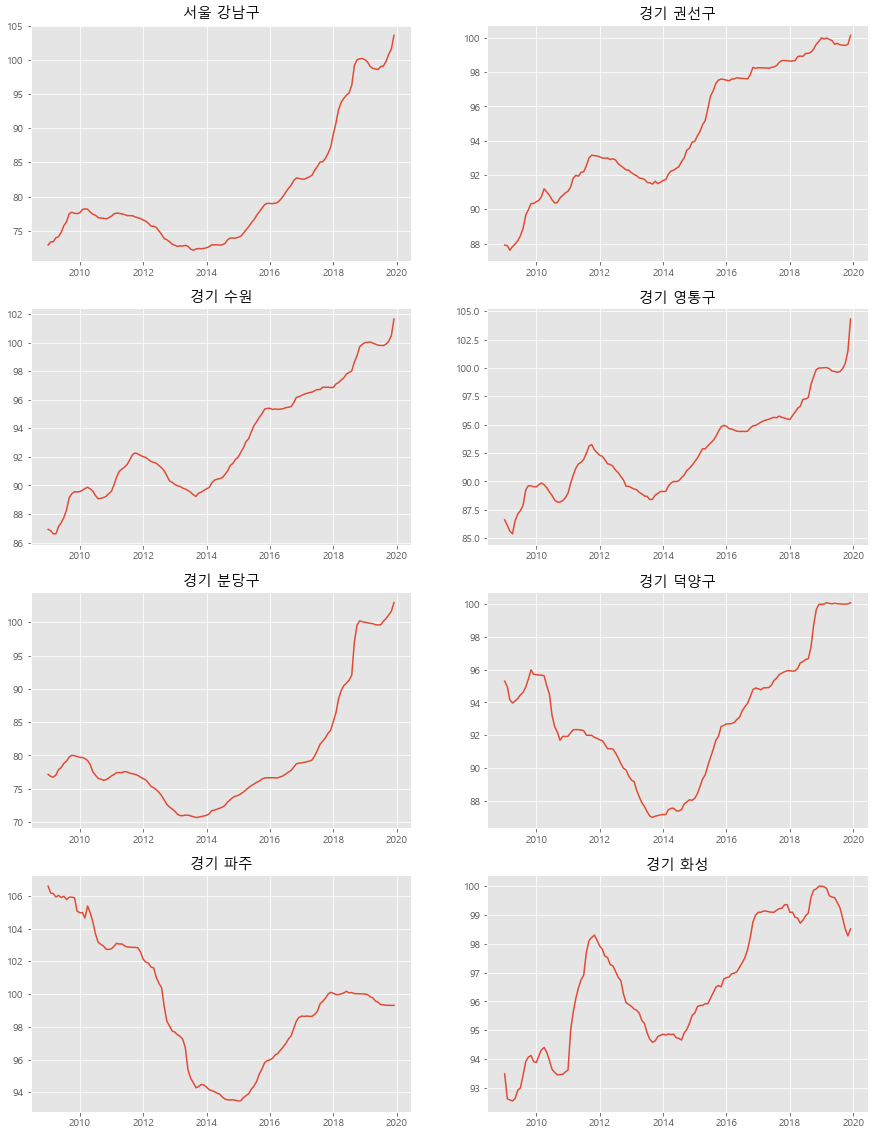

In [16]:
# 여러 지역의 최근 10년 가격지수 추이 그래프 ( 작은 범위 )
plt.figure(figsize=(10,5))

spots='서울 강남구,경기 권선구,경기 수원,경기 영통구,경기 분당구,경기 덕양구,경기 파주,경기 화성'.split(',')
start_date='2009-1'
num_row=int((len(spots)-1)/2)+1

plt.figure(figsize=(15,num_row*5))
for i,spot in enumerate(spots):
    plt.subplot(num_row,2,i+1)
    plt.title(spot)
    plt.plot(new_data[spot.split(' ')[0]][spot.split(' ')[1]][start_date:])

### 부동산 증감률 하위/상위 20군데 데이터 계산 / 그래프 출력

In [14]:
import numpy as np
from matplotlib import style
style.use('ggplot')

In [15]:
# 2016 ~ 2019 사이 가격지수 증감률 계산
diff=((new_data.loc['2019-01-01']-new_data.loc['2016-01-01'])/new_data.loc['2016-01-01']*100).dropna()
print("하위 10개")
print(diff.sort_values()[:10])
print("상위 10개")
print(diff.sort_values(ascending=False)[:10])

하위 10개
경남  성산구   -17.5031
    의창구   -11.7546
    창원     -10.066
울산  북구    -9.92518
충북  상당구   -9.78328
경북  구미    -9.42288
울산  동구    -9.10523
경남  진해구    -9.0048
경북  북구    -8.87082
경남  김해    -8.74131
dtype: object
상위 10개
경기  분당구     30.4665
서울  영등포구    27.5787
    강남구     26.6079
    송파구     22.0059
    용산구     21.8145
    양천구     21.0598
    성동구     20.5795
경기  광명      20.4761
서울  서초구     20.1666
    강남      19.7414
dtype: object


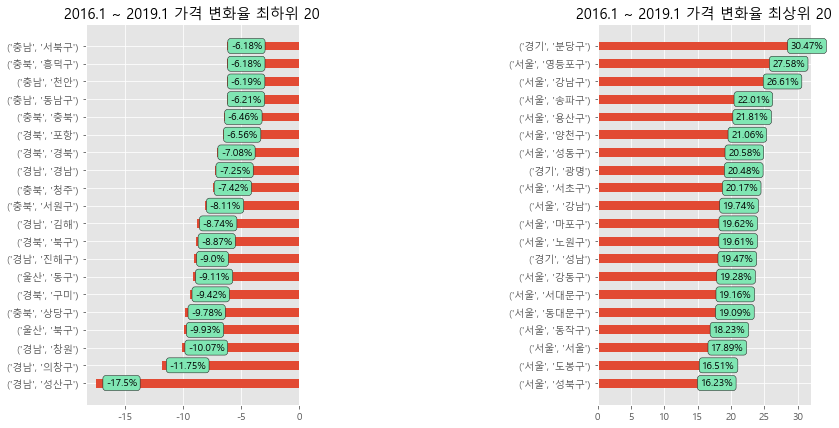

In [18]:
# 그래프 사이즈 준비
fig=plt.figure(figsize=(13,7))
ind=np.arange(20)

# 하위 20 지역의 가격지수 증감률 그래프
ax=fig.add_subplot(1,3,1)
plt.title('2016.1 ~ 2019.1 가격 변화율 최하위 20')
rects=plt.barh(ind,diff.sort_values()[:20].values,align='center',height=0.5)
plt.yticks(ind,diff.sort_values()[:20].index)
for i, rect in enumerate(rects):
    ax.text(0.95*rect.get_width(),
           rect.get_y()+rect.get_height()/2.0,
           str(round(diff.sort_values()[:20].values[i],2))+'%',
           ha='left',va='center',bbox=dict(boxstyle="round",fc=(0.5,0.9,0.7),ec="0.1"))
    
# 상위 20 지역의 가격지수 증감률 그래프
ax2=fig.add_subplot(1,3,3)
plt.title('2016.1 ~ 2019.1 가격 변화율 최상위 20')
rects2=plt.barh(ind,diff.sort_values()[-20:].values,align='center',height=0.5)
plt.yticks(ind,diff.sort_values()[-20:].index)
for i, rect in enumerate(rects2):
    ax2.text(0.95*rect.get_width(),
           rect.get_y()+rect.get_height()/2.0,
           str(round(diff.sort_values()[-20:].values[i],2))+'%',
           ha='left',va='center',bbox=dict(boxstyle="round",fc=(0.5,0.9,0.7),ec="0.1"))

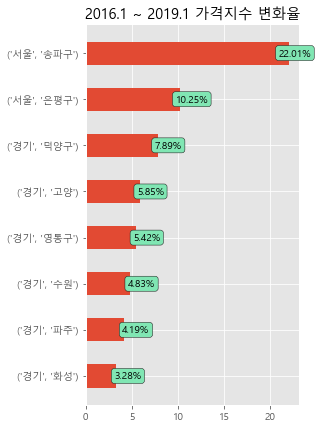

In [19]:
# 특정 지역의 가격지수 증감률 (2016.01.01 ~ 2019.01.01) 시각화
loca='서울 송파구,서울 은평구,경기 수원,경기 영통구,경기 고양,경기 덕양구,경기 파주,경기 화성'.split(',')

loca_list=[]
for tmp in loca:
    if ' ' in tmp:
        tmp_split=tmp.split(' ')
        loca_list.append((tmp_split[0],tmp_split[1]))
    else:
        loca_list.append((tmp,tmp))

diff=((new_data.loc['2019-01-01',loca_list]-new_data.loc['2016-01-01',loca_list])/new_data.loc['2016-01-01',loca_list]*100).dropna().sort_values()

num=len(loca_list)
fig=plt.figure(figsize=(13,7))
ind=np.arange(num)

ax=fig.add_subplot(1,3,1)
plt.title('2016.1 ~ 2019.1 가격지수 변화율')
rects=plt.barh(ind,diff.head(num).values,align='center',height=0.5)
plt.yticks(ind,diff.head(num).index)
for i, rect in enumerate(rects):
    ax.text(0.95*rect.get_width(),
           rect.get_y()+rect.get_height()/2.0,
           str(round(diff.head(num).values[i],2))+'%',
           ha='left',va='center',bbox=dict(boxstyle="round",fc=(0.5,0.9,0.7),ec="0.1"))